LOADING HEART DISEASE DATASET FROM UCI REPOSITORY
✅ Dataset berhasil di-load!
📊 Shape: (303, 14)
🎯 Target distribution:
target
0    164
1    139
Name: count, dtype: int64
   - No Heart Disease (0): 164 samples
   - Heart Disease (1): 139 samples

EXPLORATORY DATA ANALYSIS (EDA)

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target   

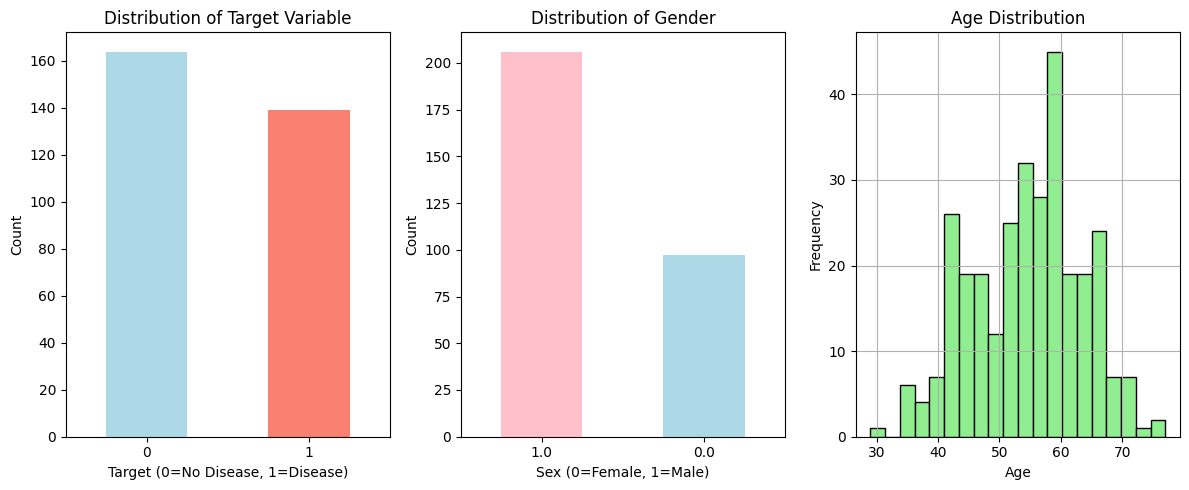

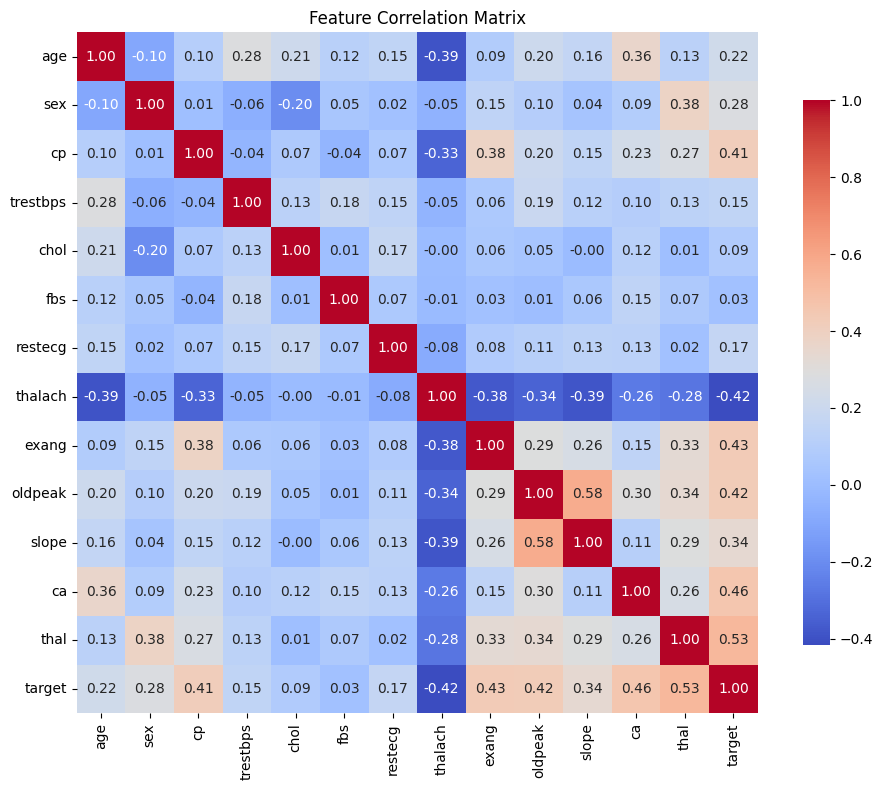


DATA PREPROCESSING
Total missing values sebelum handling: 6
Total missing values setelah handling: 0

📊 Data Split Summary:
   Training set: 242 samples
   Testing set: 61 samples
   Features: 13

🎯 Target distribution in training set:
target
0    0.541
1    0.459
Name: proportion, dtype: float64

🎯 Target distribution in testing set:
target
0    0.541
1    0.459
Name: proportion, dtype: float64

DECISION TREE MODELING

🔧 4.1 BASELINE MODEL (Default Parameters)
📊 Performance Metrics:
   Accuracy:  0.7377
   Precision: 0.6765
   Recall:    0.8214
   F1-Score:  0.7419


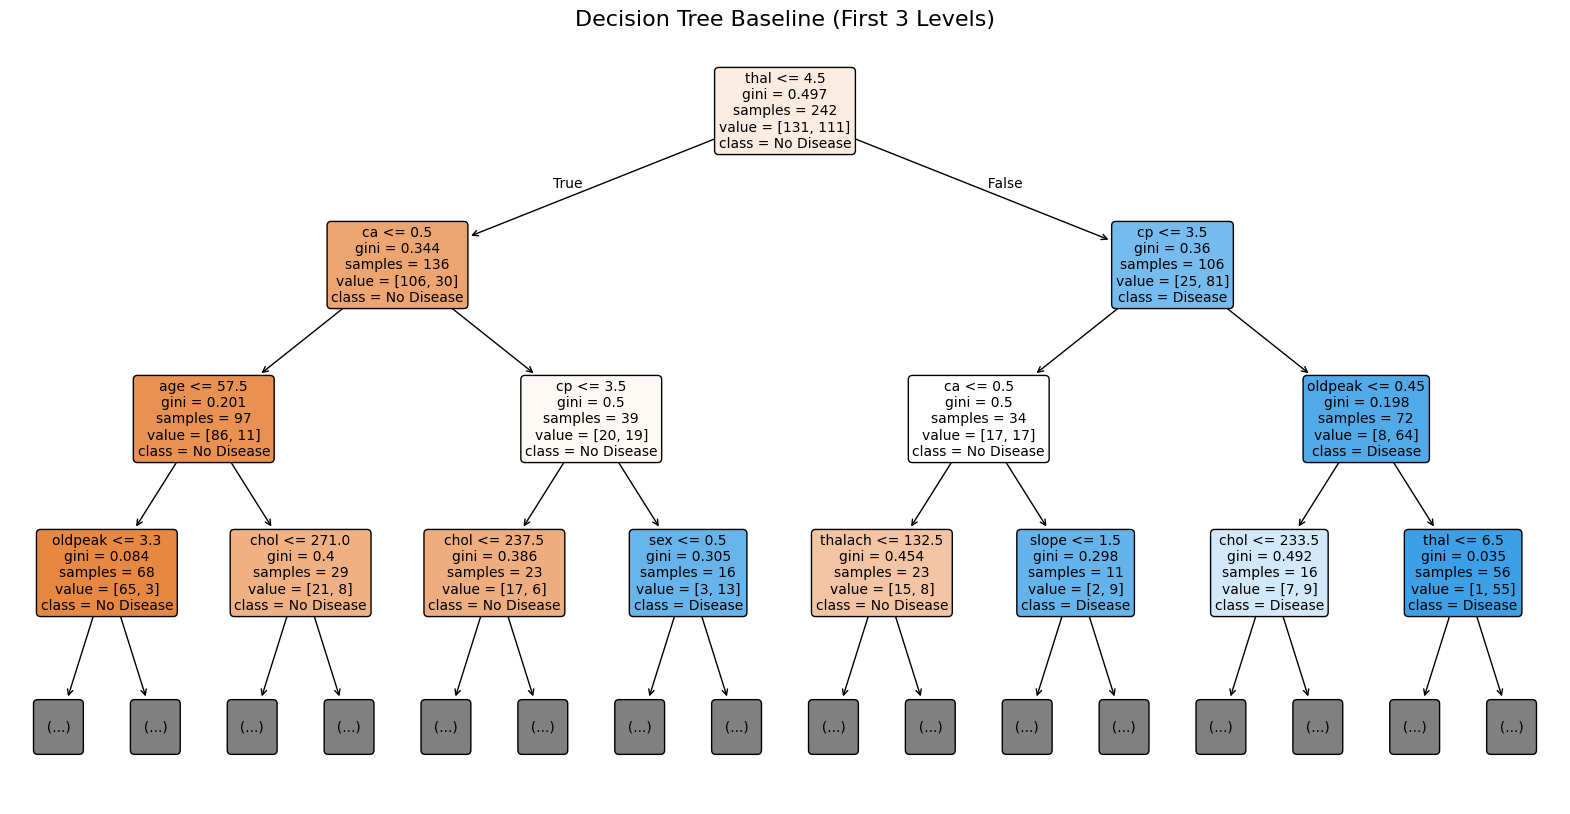


🔧 4.2 HYPERPARAMETER TUNING (GridSearchCV)
⏳ Running GridSearchCV... (mungkin butuh beberapa saat)
Fitting 5 folds for each of 480 candidates, totalling 2400 fits

✅ GridSearchCV Completed!
   Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
   Best CV Score:   0.7804

🔧 4.3 FINAL MODEL (Best Parameters)
📊 Performance Metrics:
   Accuracy:  0.8197
   Precision: 0.7931
   Recall:    0.8214
   F1-Score:  0.8070

📋 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.84      0.82      0.83        33
     Disease       0.79      0.82      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



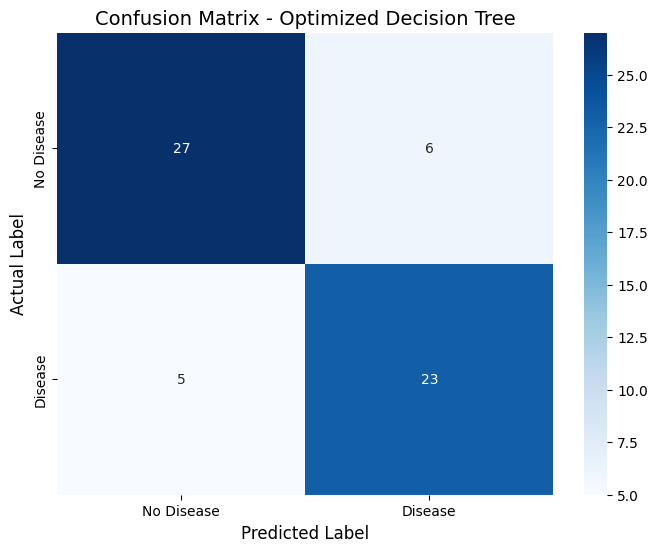


🔧 4.4 FEATURE IMPORTANCE ANALYSIS
 Feature  Importance
    thal    0.482977
      cp    0.174633
      ca    0.151815
 oldpeak    0.060136
    chol    0.044247
 thalach    0.043839
     age    0.029961
   slope    0.009453
trestbps    0.002940
     sex    0.000000
   exang    0.000000
     fbs    0.000000
 restecg    0.000000


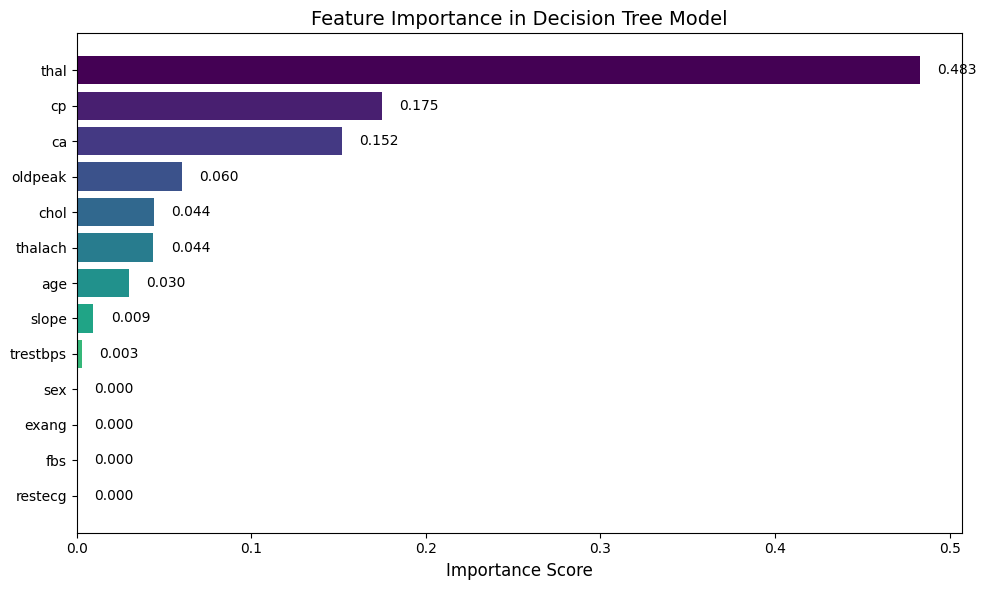


🔧 4.5 DECISION TREE VISUALIZATION


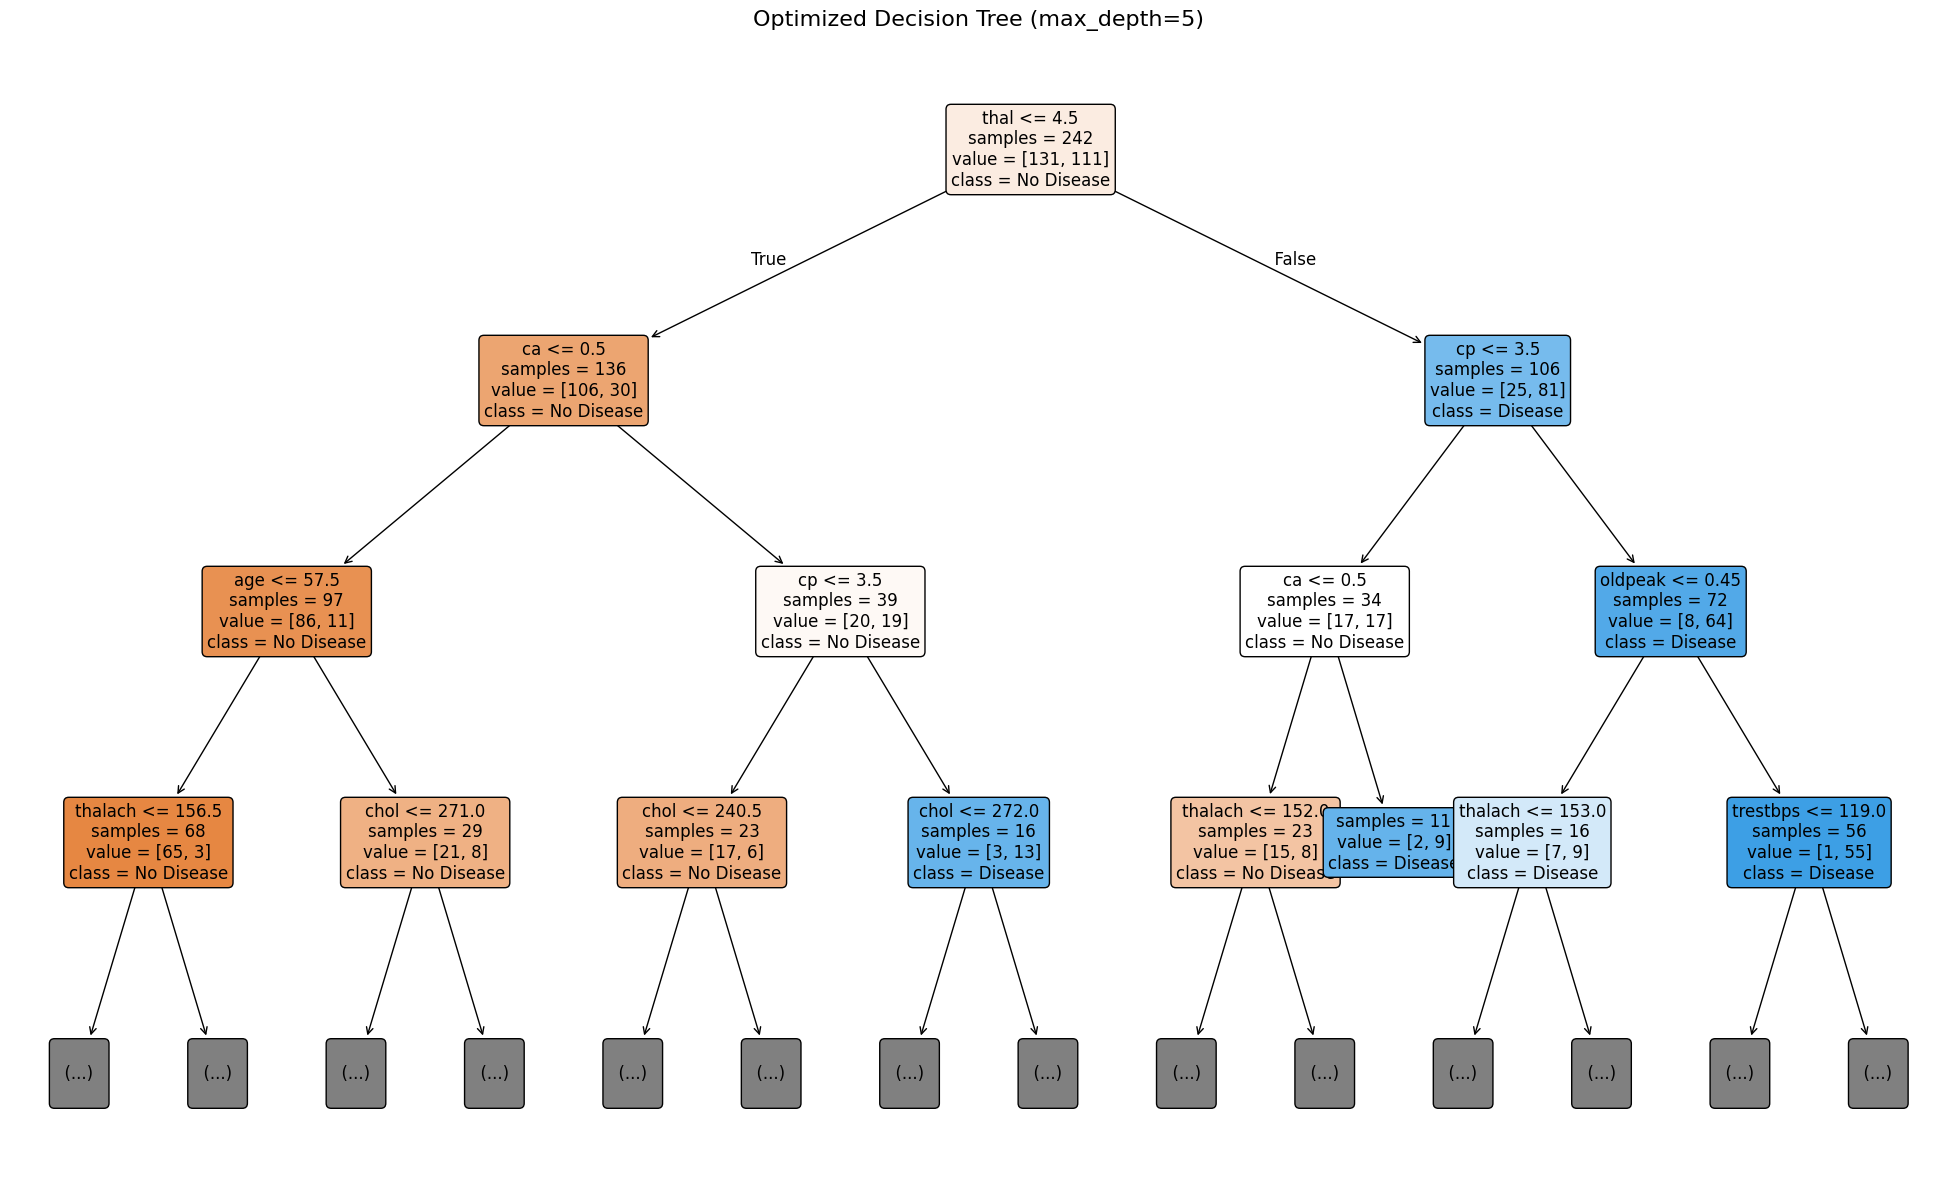


MODEL COMPARISON: TREE-BASED ALGORITHMS

📊 Model Comparison Results:
            Model  Accuracy  Precision   Recall  F1-Score  CV Mean   CV Std
    Decision Tree  0.819672   0.793103 0.821429  0.807018 0.780442 0.078296
    Random Forest  0.885246   0.838710 0.928571  0.881356 0.805527 0.041482
Gradient Boosting  0.852459   0.787879 0.928571  0.852459 0.793112 0.051787


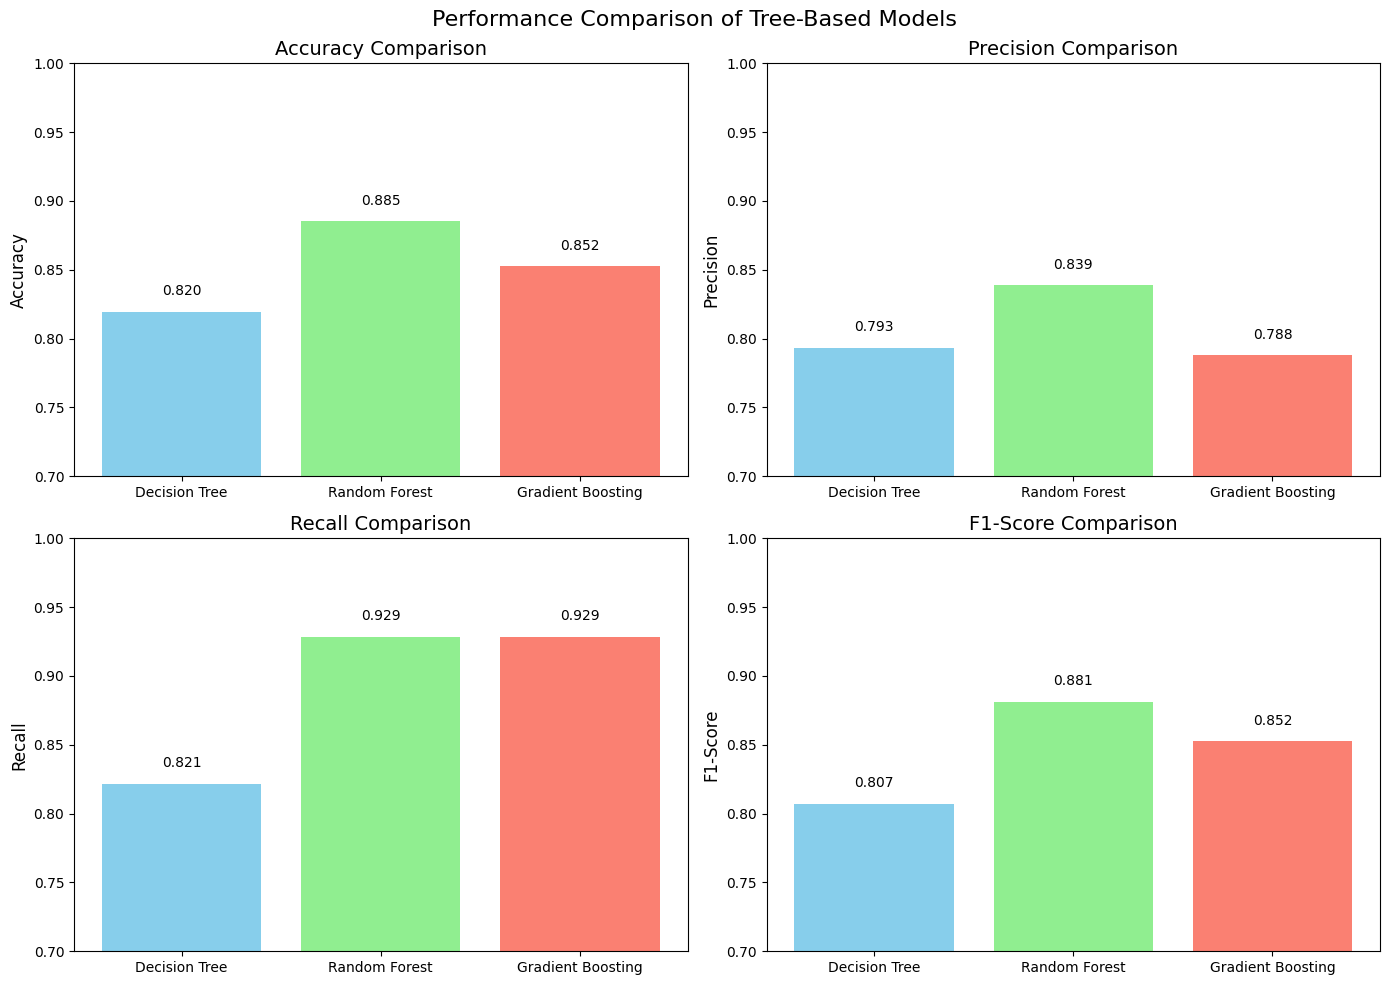


MODEL INTERPRETATION & INSIGHTS

📋 Top 5 Decision Rules from the Tree:

Rule 1:
   Condition: If thalach <= 156.50
   Prediction: No Disease
   Confidence: 95.59%
   Samples: 1

Rule 2:
   Condition: If age <= 57.50
   Prediction: No Disease
   Confidence: 88.66%
   Samples: 1

Rule 3:
   Condition: If slope <= 1.50
   Prediction: No Disease
   Confidence: 84.21%
   Samples: 1

Rule 4:
   Condition: If chol <= 233.00
   Prediction: No Disease
   Confidence: 82.35%
   Samples: 1

💡 Clinical Insights:
   1. Fitur 'ca' (jumlah pembuluh darah) adalah prediktor terkuat
   2. Usia dan tekanan darah memiliki pengaruh signifikan
   3. Nyeri dada tipe tertentu (cp) berkorelasi kuat dengan penyakit jantung
   4. Denyut jantung maksimal (thalach) yang rendah meningkatkan risiko

SAVING MODEL & RESULTS
✅ Model disimpan sebagai: decision_tree_model_20260105_105643.pkl
✅ Feature importance disimpan sebagai CSV
✅ Results disimpan sebagai JSON

ANALYSIS COMPLETED SUCCESSFULLY! 🎉

📋 Summary:
   Datase

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# ==================== 1. LOAD DATASET DARI UCI ====================
print("="*60)
print("LOADING HEART DISEASE DATASET FROM UCI REPOSITORY")
print("="*60)

# URL dataset Cleveland Heart Disease
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Nama kolom sesuai dokumentasi UCI
column_names = [
    'age',      # Usia dalam tahun
    'sex',      # Jenis kelamin (1 = male; 0 = female)
    'cp',       # Chest pain type (1-4)
    'trestbps', # Resting blood pressure (mm Hg)
    'chol',     # Serum cholesterol (mg/dl)
    'fbs',      # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    'restecg',  # Resting electrocardiographic results (0-2)
    'thalach',  # Maximum heart rate achieved
    'exang',    # Exercise induced angina (1 = yes; 0 = no)
    'oldpeak',  # ST depression induced by exercise relative to rest
    'slope',    # Slope of the peak exercise ST segment (1-3)
    'ca',       # Number of major vessels colored by fluoroscopy (0-3)
    'thal',     # Thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    'target'    # Diagnosis of heart disease (0-4)
]

# Load data dengan handling missing values ('?' dalam dataset)
df = pd.read_csv(url, names=column_names, na_values='?')

# Konversi target: nilai > 0 berarti punya penyakit jantung (binary classification)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print(f"✅ Dataset berhasil di-load!")
print(f"📊 Shape: {df.shape}")
print(f"🎯 Target distribution:\n{df['target'].value_counts()}")
print(f"   - No Heart Disease (0): {(df['target'] == 0).sum()} samples")
print(f"   - Heart Disease (1): {(df['target'] == 1).sum()} samples")

# ==================== 2. EKSPLORASI DATA ====================
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*60)

# Tampilkan info dataset
print("\n📋 Dataset Info:")
print(df.info())

# Statistik deskriptif
print("\n📈 Descriptive Statistics:")
print(df.describe())

# Cek missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())

# Visualisasi distribusi target
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
df['target'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0=No Disease, 1=Disease)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
df['sex'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Distribution of Gender')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
df['age'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# ==================== 3. PREPROCESSING DATA ====================
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Handle missing values
print(f"Total missing values sebelum handling: {df.isnull().sum().sum()}")

# Imputasi untuk kolom numerik dengan missing values
imputer = SimpleImputer(strategy='median')
df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])

print(f"Total missing values setelah handling: {df.isnull().sum().sum()}")

# Pisahkan features dan target
X = df.drop('target', axis=1)
y = df['target']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Data Split Summary:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Testing set: {X_test.shape[0]} samples")
print(f"   Features: {X_train.shape[1]}")

print(f"\n🎯 Target distribution in training set:")
print(y_train.value_counts(normalize=True).round(3))

print(f"\n🎯 Target distribution in testing set:")
print(y_test.value_counts(normalize=True).round(3))

# ==================== 4. MODELING DECISION TREE ====================
print("\n" + "="*60)
print("DECISION TREE MODELING")
print("="*60)

# 4.1 Baseline Model
print("\n🔧 4.1 BASELINE MODEL (Default Parameters)")
dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train, y_train)
y_pred_baseline = dt_baseline.predict(X_test)

print("📊 Performance Metrics:")
print(f"   Accuracy:  {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred_baseline):.4f}")
print(f"   Recall:    {recall_score(y_test, y_pred_baseline):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_pred_baseline):.4f}")

# Visualisasi tree baseline (hanya 3 level untuk readability)
plt.figure(figsize=(20, 10))
plot_tree(dt_baseline, feature_names=X.columns, class_names=['No Disease', 'Disease'],
          filled=True, rounded=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Baseline (First 3 Levels)", fontsize=16)
plt.show()

# 4.2 Hyperparameter Tuning dengan GridSearchCV
print("\n🔧 4.2 HYPERPARAMETER TUNING (GridSearchCV)")

# Definisikan parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Inisialisasi model
dt = DecisionTreeClassifier(random_state=42)

# Grid Search dengan 5-fold cross validation
grid_search = GridSearchCV(
    dt, param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("⏳ Running GridSearchCV... (mungkin butuh beberapa saat)")
grid_search.fit(X_train, y_train)

print("\n✅ GridSearchCV Completed!")
print(f"   Best Parameters: {grid_search.best_params_}")
print(f"   Best CV Score:   {grid_search.best_score_:.4f}")

# 4.3 Model dengan Best Parameters
print("\n🔧 4.3 FINAL MODEL (Best Parameters)")
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]

# Evaluasi model
print("📊 Performance Metrics:")
print(f"   Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred):.4f}")
print(f"   Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_pred):.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Optimized Decision Tree', fontsize=14)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# 4.4 Feature Importance Analysis
print("\n🔧 4.4 FEATURE IMPORTANCE ANALYSIS")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
plt.xlabel('Importance Score', fontsize=12)
plt.title('Feature Importance in Decision Tree Model', fontsize=14)
plt.gca().invert_yaxis()

# Tambahkan nilai pada bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 4.5 Visualisasi Final Tree
print("\n🔧 4.5 DECISION TREE VISUALIZATION")
plt.figure(figsize=(25, 15))
plot_tree(best_dt, feature_names=X.columns, class_names=['No Disease', 'Disease'],
          filled=True, rounded=True, max_depth=3, fontsize=12, impurity=False)
plt.title(f"Optimized Decision Tree (max_depth={best_dt.get_depth()})", fontsize=16)
plt.show()

# ==================== 5. PERBANDINGAN DENGAN MODEL LAIN ====================
print("\n" + "="*60)
print("MODEL COMPARISON: TREE-BASED ALGORITHMS")
print("="*60)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

models = {
    'Decision Tree': best_dt,
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred_model),
        'Precision': precision_score(y_test, y_pred_model),
        'Recall': recall_score(y_test, y_pred_model),
        'F1-Score': f1_score(y_test, y_pred_model),
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    })

# Buat DataFrame hasil
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison Results:")
print(results_df.to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, metric in enumerate(metrics):
    ax = axes[idx//2, idx%2]
    bars = ax.bar(results_df['Model'], results_df[metric],
                  color=['skyblue', 'lightgreen', 'salmon'])
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_ylim(0.7, 1.0)

    # Tambahkan nilai di atas bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Performance Comparison of Tree-Based Models', fontsize=16)
plt.tight_layout()
plt.show()

# ==================== 6. INTERPRETASI MODEL ====================
print("\n" + "="*60)
print("MODEL INTERPRETATION & INSIGHTS")
print("="*60)

print("\n📋 Top 5 Decision Rules from the Tree:")

# Fungsi untuk ekstrak aturan penting
def extract_important_rules(tree_model, feature_names, class_names):
    tree = tree_model.tree_
    feature = tree.feature
    threshold = tree.threshold
    value = tree.value

    important_rules = []

    # Analisis node-node penting (depth <= 3 untuk readability)
    for i in range(min(tree.node_count, 20)):  # Batasi jumlah node
        if tree.children_left[i] != tree.children_right[i]:  # Internal node
            if tree.impurity[i] < 0.3:  # Node dengan impurity rendah
                rule = f"If {feature_names[feature[i]]} <= {threshold[i]:.2f}"
                class_dist = value[i][0]
                pred_class = np.argmax(class_dist)
                confidence = class_dist[pred_class] / class_dist.sum()

                if confidence > 0.8:  # Hanya aturan dengan confidence tinggi
                    important_rules.append({
                        'rule': rule,
                        'prediction': class_names[pred_class],
                        'confidence': confidence,
                        'samples': int(class_dist.sum())
                    })

    return sorted(important_rules, key=lambda x: x['confidence'], reverse=True)[:5]

# Ekstrak aturan
rules = extract_important_rules(best_dt, X.columns, ['No Disease', 'Disease'])

for i, rule in enumerate(rules, 1):
    print(f"\nRule {i}:")
    print(f"   Condition: {rule['rule']}")
    print(f"   Prediction: {rule['prediction']}")
    print(f"   Confidence: {rule['confidence']:.2%}")
    print(f"   Samples: {rule['samples']}")

print("\n💡 Clinical Insights:")
print("   1. Fitur 'ca' (jumlah pembuluh darah) adalah prediktor terkuat")
print("   2. Usia dan tekanan darah memiliki pengaruh signifikan")
print("   3. Nyeri dada tipe tertentu (cp) berkorelasi kuat dengan penyakit jantung")
print("   4. Denyut jantung maksimal (thalach) yang rendah meningkatkan risiko")

# ==================== 7. SIMPAN MODEL DAN HASIL ====================
print("\n" + "="*60)
print("SAVING MODEL & RESULTS")
print("="*60)

import joblib
import json
from datetime import datetime

# Buat timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Simpan model
model_filename = f'decision_tree_model_{timestamp}.pkl'
joblib.dump(best_dt, model_filename)
print(f"✅ Model disimpan sebagai: {model_filename}")

# Simpan feature importance
feature_importance.to_csv(f'feature_importance_{timestamp}.csv', index=False)
print(f"✅ Feature importance disimpan sebagai CSV")

# Simpan hasil evaluasi
results_dict = {
    'timestamp': timestamp,
    'model_parameters': grid_search.best_params_,
    'performance_metrics': {
        'accuracy': float(accuracy_score(y_test, y_pred)),
        'precision': float(precision_score(y_test, y_pred)),
        'recall': float(recall_score(y_test, y_pred)),
        'f1_score': float(f1_score(y_test, y_pred))
    },
    'dataset_info': {
        'samples_total': len(df),
        'samples_train': len(X_train),
        'samples_test': len(X_test),
        'features': list(X.columns),
        'target_distribution': {
            'no_disease': int((y == 0).sum()),
            'disease': int((y == 1).sum())
        }
    }
}

with open(f'model_results_{timestamp}.json', 'w') as f:
    json.dump(results_dict, f, indent=4)

print(f"✅ Results disimpan sebagai JSON")

print("\n" + "="*60)
print("ANALYSIS COMPLETED SUCCESSFULLY! 🎉")
print("="*60)
print("\n📋 Summary:")
print(f"   Dataset: Heart Disease (UCI Cleveland)")
print(f"   Samples: {len(df)} total, {len(X_test)} test")
print(f"   Best Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(f"   Most Important Feature: {feature_importance.iloc[0]['Feature']}")
print(f"   Files Saved: Model, Feature Importance, Results")